# Musk tweets

This code cell creates a list from some of Elon Musk's tweets. 

*You're not expected to completely understand this code yet. It's only here to give us interesting data*.

In [1]:
import pandas

raw_tweets = pandas.read_csv('https://raw.githubusercontent.com/robeverest/cs1010/master/data/elonmusk-full.csv')
elon_tweets = list(map(str, list(raw_tweets.tweet)))

What words follow other words and how often?

In [ ]:
example_tweet = "the cat sat on the mat. the cat slept"

# the 2-> cat, the -> mat., cat -> sat, sat -> on, on -> the, cat -> slept

example_result = { None: { "the": 1 }, "the": { "cat": 2, "mat.": 1}, 
                  "cat": { "sat": 1, "slept": 1}, "sat": { "on": 1 }, "on": {"the": 1}}

"the cat sat on the cat sat on the cat sat on"

# word_pairs = []
# for tweet in elon_tweets:
#     previous_word = None
#     for word in tweet.split():
#         word_pairs.append((previous_word, word))
#         previous_word = word
# word_pairs

word_probabilities = {}

word_probabilities[None] = {}

for tweet in elon_tweets:
    previous_word = None
    for word in tweet.split():
        if word in word_probabilities[previous_word]:
            word_probabilities[previous_word][word] += 1
        else:
            word_probabilities[previous_word][word] = 1
        if not word in word_probabilities:
            word_probabilities[word] = {} 
        previous_word = word
word_probabilities

In [ ]:
word_probabilities[None]

What words are only ever followed by one or zero other words?

In [ ]:
# for word in word_probabilities:
#     if word_probabilities[word] == {}:
#         print(word)

for word in word_probabilities:
    if len(word_probabilities[word]) == 1:
        print(word)
        print(word_probabilities[word].keys())

Can we use this to generate convincing sounding Elon tweets?

In [50]:
import random

def random_word(words_weight):
    if words_weight == {}:
        return None
    words = random.choices(list(words_weight.keys()), weights=list(words_weight.values()))
    return words[0]

def generate_tweet():
    word = random_word(word_probabilities[None])
    tweet = ""
    while word != None and len(tweet + word) < 280:
        tweet = tweet + word + " "
        word = random_word(word_probabilities[word])
    if word != None:
        tweet = tweet.strip() + '...'
    return tweet.strip()

generate_tweet()

'Good chance they have Heard an OTA update) primarily from remaining Model Y anytime from Daimler invested $50M in arrow form of PCR Ct value on their negativity bias?'

How often are generated tweets identical to real tweets? 

In [53]:
actual_tweets = 0

for _ in range(1000):
    tweet = generate_tweet()
    if tweet in elon_tweets:
        actual_tweets += 1

actual_tweets/1000

0.045

Can we generalise our work to look at what words follow N previous words?

In [ ]:
example_tweet = "the cat sat on the mat. the cat slept"

# the cat -> sat, cat sat -> on, sat on -> the, on the -> mat., the mat. -> the, mat. the -> cat, the cat -> slept

example_result = { None: { "the": 1 },
                  "the": { "cat": 1},
                  "the cat": { "sat": 1, "slept": 1 }, 
                  "cat sat": { "on": 1 }, 
                  "sat on": { "the": 1 },
                  "on the": { "mat.": 1 },
                  "the mat.": { "the": 1 },
                  "mat. the": { "cat": 1 },
                  "the cat": { "slept": 1 } }

prefix = tuple()
example_word_map = {}
example_word_map[tuple()] = {}

for word in example_tweet.split():
    # print(prefix)
    # Have we seen this prefix before?
    if not prefix in example_word_map:
        # If we haven't, add an entry to the word map
        example_word_map[prefix] = {}
    # Have we seen this word follow the prefix?
    if word in example_word_map[prefix]:
        # If it has, increase the count by 1
        example_word_map[prefix][word] += 1
    else:
        # If it hasn't, set the count to 1
        example_word_map[prefix][word] = 1

    if len(prefix) == 0:
        # If we don't have a prefix yet, the prefix is just one word
        prefix = (word,)
    elif len(prefix) == 1:
        # If our prefix is already one word, we make it the two words
        prefix = (prefix[0], word)
    else:
        # If our prefix is already 2 words, remove the first word and add the new word to the end
        prefix = (prefix[1], word)

example_word_map

In [ ]:
elon_word_map = {}
elon_word_map[tuple()] = {}

for tweet in elon_tweets:
    prefix = tuple()
    for word in tweet.split():
        # Have we seen this prefix before?
        if not prefix in elon_word_map:
            # If we haven't, add an entry to the word map
            elon_word_map[prefix] = {}
        # Have we seen this word follow the prefix?
        if word in elon_word_map[prefix]:
            # If it has, increase the count by 1
            elon_word_map[prefix][word] += 1
        else:
            # If it hasn't, set the count to 1
            elon_word_map[prefix][word] = 1

        if len(prefix) == 0:
            # If we don't have a prefix yet, the prefix is just one word
            prefix = (word,)
        elif len(prefix) == 1:
            # If our prefix is already one word, we make it the two words
            prefix = (prefix[0], word)
        else:
            # If our prefix is already 2 words, remove the first word and add the new word to the end
            prefix = (prefix[1], word)

elon_word_map

In [93]:
def random_word(words_weight):
    if words_weight == {}:
        return None
    words = random.choices(list(words_weight.keys()), weights=list(words_weight.values()))
    return words[0]

def generate_tweet():
    word = random_word(elon_word_map[tuple()])
    tweet = ""
    prefix = tuple()
    while word != None and len(tweet + word) < 280:
        tweet = tweet + word + " "
        if len(prefix) == 0:
            # If we don't have a prefix yet, the prefix is just one word
            prefix = (word,)
        elif len(prefix) == 1:
            # If our prefix is already one word, we make it the two words
            prefix = (prefix[0], word)
        else:
            # If our prefix is already 2 words, remove the first word and add the new word to the end
            prefix = (prefix[1], word)

        if prefix in elon_word_map:
            # There is a word we can use
            word = random_word(elon_word_map[prefix])
        else:
            # No words follow on from this prefix
            word = None
    if word != None:
        tweet = tweet.strip() + '...'
    return tweet.strip()

generate_tweet()

'Yeah, it looks your Photoshop bill was very hard to fit André the giant fairing (nosecone) of Falcon 9 flight 11 to geosynchronous transfer orbit completed on target this morning looks good. Started deploying the 10 Iridium satellites. Rocket is extra toasty and hit the ceiling....'

In [98]:
x = "     he   llo     "

x.strip()

'he   llo'

# Images

<img src="https://source.unsplash.com/deb2EnbWPr8" width=500 />

**Important info**:
* An image is a $width \times height$ grid of pixels
* Each pixel has a Red, Green, and Blue component


Using the [Pillow](https://python-pillow.org/) library in python allows us to create and manipulate images.

**Note:** This is not something we will be covering in depth in this course, so don't feel you have to memorise how to manipulate images.

Can we create a blank canvas

In [ ]:
from PIL import Image

im = Image.new(mode='RGB', size=(800,600), color='white')

im

Can we create some abstract art

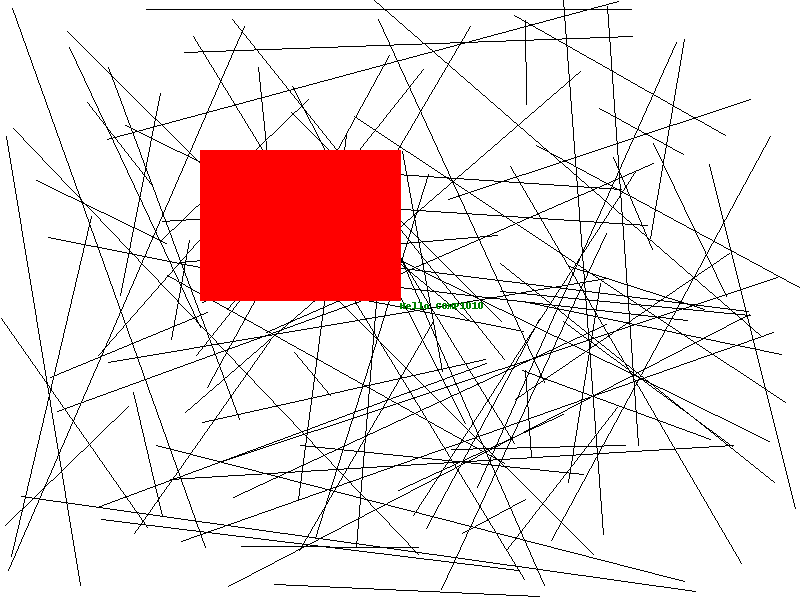

In [74]:
from PIL import Image, ImageDraw
import random

im = Image.new(mode='RGB', size=(800,600), color='white')

drawer = ImageDraw.Draw(im)

for _ in range(100):
    start_x = random.randint(0, 800)
    start_y = random.randint(0, 600)
    end_x = random.randint(0, 800)
    end_y = random.randint(0, 600)
    drawer.line((start_x, start_y, end_x, end_y), fill='black')

drawer.text((400,300), 'Hello COMP1010', fill='green')

drawer.rectangle((200,150,400,300), fill='red')

im

Can we blur our art?

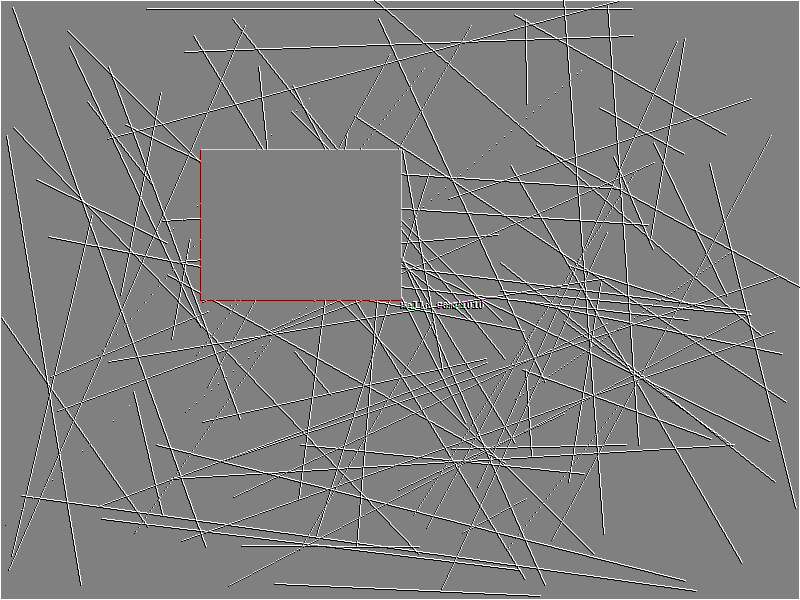

In [84]:
from PIL import ImageFilter

im.filter(ImageFilter.EMBOSS)